In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df_train = pd.read_csv("/content/drive/My Drive/data/movie-review-sentiment-analysis-kernels-only/train.tsv", sep='\t')
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df_test = pd.read_csv("/content/drive/My Drive/data/movie-review-sentiment-analysis-kernels-only/test.tsv", sep='\t')
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [5]:
df_train.shape

(156060, 4)

In [6]:
df_test.shape

(66292, 3)

In [7]:
full_text = list(df_test['Phrase'])+list(df_train['Phrase'])
len(full_text)

222352

In [8]:
df_train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


Dopping Insigificatnt Columns


In [10]:
df_train['Phrase_len'] = [len(t) for t in df_train['Phrase']]
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_len
0,1,1,A series of escapades demonstrating the adage ...,1,188
1,2,1,A series of escapades demonstrating the adage ...,2,77
2,3,1,A series,2,8
3,4,1,A,2,1
4,5,1,series,2,6


In [11]:
# Creating a new column having sentiment names against their Sentiment Label
df_train['Sentiment_Name']= df_train['Sentiment'].replace({0:"negative",1:"some-negative",2:"neutral",3:'some-positive',4:'positive'})
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_len,Sentiment_Name
0,1,1,A series of escapades demonstrating the adage ...,1,188,some-negative
1,2,1,A series of escapades demonstrating the adage ...,2,77,neutral
2,3,1,A series,2,8,neutral
3,4,1,A,2,1,neutral
4,5,1,series,2,6,neutral


Text(0.5, 1.0, 'Seniment Types')

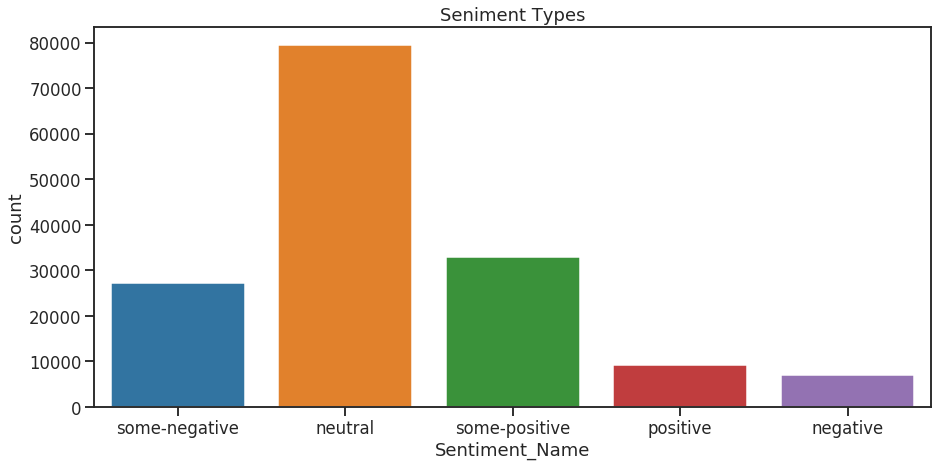

In [12]:
sns.set_style("ticks")
sns.set_context("talk")
#style.use('seaborn-bright')
plt.figure(figsize=(15,7))
sns.countplot("Sentiment_Name",data= df_train)
plt.title('Seniment Types')

In [13]:
# Sentiments vs Pharses Count
senti_phrase=df_train.groupby(['Sentiment_Name'])['PhraseId'].count().sort_values(ascending=False)
print("Phrases count wr.t various Sentiments:\n ",senti_phrase)

Phrases count wr.t various Sentiments:
  Sentiment_Name
neutral          79582
some-positive    32927
some-negative    27273
positive          9206
negative          7072
Name: PhraseId, dtype: int64


Text(0.5, 1.0, 'Sentiments vs Phrases Used')

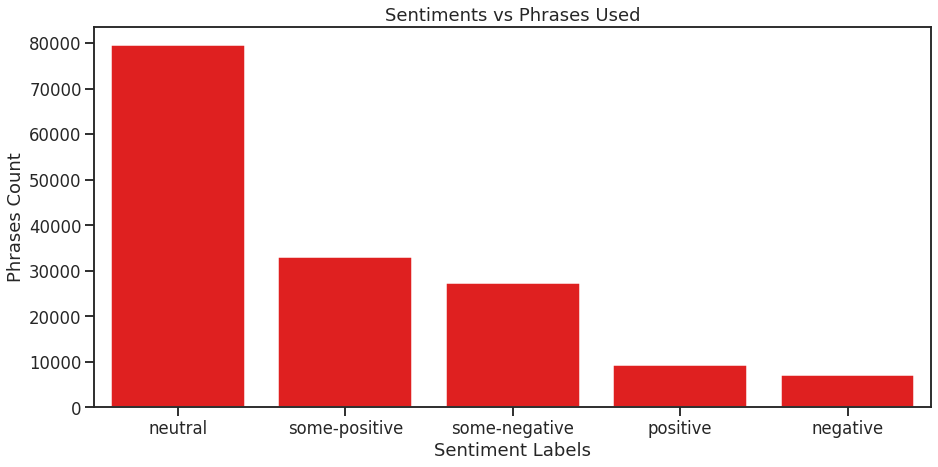

In [14]:
# Plotting Sentiment labels vs  Pharses Count
sns.set_style("ticks")
sns.set_context("talk")
x=senti_phrase.index
y=senti_phrase.values
plt.figure(figsize=(15,7))
sns.barplot(x,y,color='r')
plt.xlabel('Sentiment Labels')
plt.ylabel('Phrases Count')
plt.title('Sentiments vs Phrases Used')

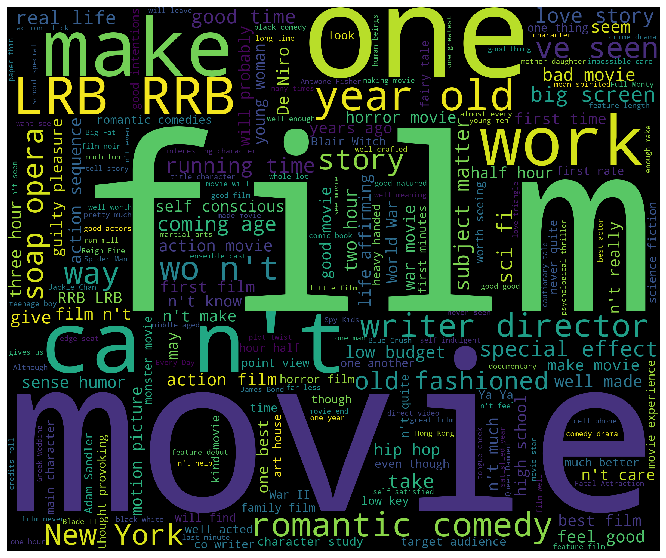

In [15]:
# Most frequently used Words in Phrases
from wordcloud import WordCloud, STOPWORDS
corpus = ' '.join(df_train['Phrase'])
corpus = corpus.replace('.', '. ')
wordcloud= WordCloud(stopwords=STOPWORDS,background_color='black', width=2400,height=2000,).generate(corpus)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

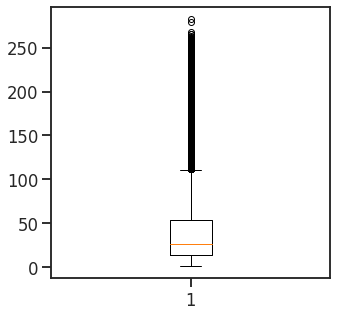

In [16]:
fig , ax = plt.subplots(figsize=(5,5))
plt.boxplot(df_train['Phrase_len'])
plt.show()

In [17]:
df_train[df_train['Phrase_len'] > 100].head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_len,Sentiment_Name
0,1,1,A series of escapades demonstrating the adage ...,1,188,some-negative
27,28,1,"is also good for the gander , some of which oc...",2,110,neutral
28,29,1,"is also good for the gander , some of which oc...",2,108,neutral
116,117,4,A positively thrilling combination of ethnogra...,3,152,some-positive
117,118,4,A positively thrilling combination of ethnogra...,4,150,positive


In [18]:
df_train[df_train['Phrase_len'] > 100].loc[0].Phrase

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

Create a Wordcloud on Positive Reviews


In [19]:
pos_phrases = df_train[df_train['Sentiment'] == 4]
pos_string = []
for t in pos_phrases['Phrase']:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

'This quiet , introspective and entertaining independent is worth seeking . quiet , introspective and'

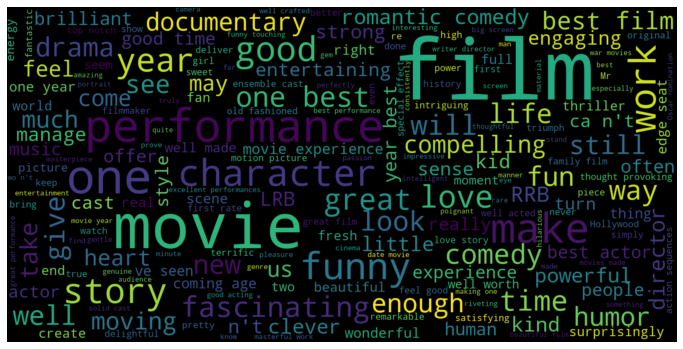

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Creating a Wordcloud on Negative Reviews


In [21]:
neg_phrases = df_train[df_train['Sentiment'] == 0]
neg_words = []
for t in neg_phrases['Phrase']:
    neg_words.append(t)
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'would have a hard time sitting through this one have a hard time sitting through this one Aggressive'

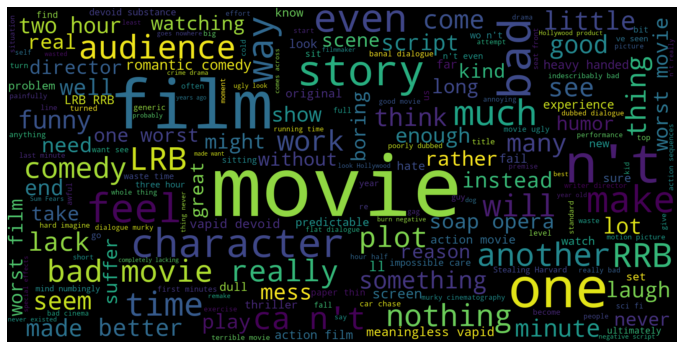

In [22]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Term frequency of each sentiment class

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvec.fit(df_train['Phrase'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
len(cvec.get_feature_names())

94644

In [0]:
neg_matrix = cvec.transform(df_train[df_train['Sentiment'] == 0].Phrase)
som_neg_matrix = cvec.transform(df_train[df_train['Sentiment'] == 1].Phrase)
neu_matrix = cvec.transform(df_train[df_train['Sentiment'] == 2].Phrase)
som_pos_matrix = cvec.transform(df_train[df_train['Sentiment'] == 3].Phrase)
pos_matrix = cvec.transform(df_train[df_train['Sentiment'] == 4].Phrase)


Term Frequency of 'negative' Sentimet

In [0]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_df = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [27]:
neg_df.head()

,Terms,negative
0,the,3462
1,and,2549
2,of,2277
3,to,1916
4,is,1372


In [28]:
neg_df = neg_df.set_index('Terms')
neg_df.head()


,negative
Terms,
the,3462
and,2549
of,2277
to,1916
is,1372


Term Frequency for 'some negative' Sentiments



In [29]:
som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_neg_df = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-negative'])
som_neg_df = som_neg_df.set_index('Terms')
som_neg_df.head()

,some-negative
Terms,
the,10885
of,6660
and,6204
to,5571
is,3362


Term Frequency for 'neutral' Sentiments

In [30]:
neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_df = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_df = neu_words_df.set_index('Terms')
neu_words_df.head()

,neutral
Terms,
the,20619
of,12287
and,10241
to,8295
in,5562


Term Frequency for 'some positive' Sentiments

In [31]:
som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_pos_words_df = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_df = som_pos_words_df.set_index('Terms')
som_pos_words_df.head()

,some-positive
Terms,
the,12459
and,9180
of,8405
to,5411
is,3489


Term Frequency for 'positive' Sentiments

In [32]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_df = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_df = pos_words_df.set_index('Terms')
pos_words_df.head()

,positive
Terms,
the,4208
and,4003
of,3073
to,1568
is,1550


In [33]:
term_freq_df = pd.concat([neg_df,som_neg_df,neu_words_df,som_pos_words_df,pos_words_df],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Total Term Frequency of all the 5 sentiment classes

In [34]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['some-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['some-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(15)

,negative,some-negative,neutral,some-positive,positive,total
the,3462,10885,20619,12459,4208,51633
of,2277,6660,12287,8405,3073,32702
and,2549,6204,10241,9180,4003,32177
to,1916,5571,8295,5411,1568,22761
in,1038,2965,5562,3365,1067,13997
is,1372,3362,3703,3489,1550,13476
that,1139,2982,3677,3280,1260,12338
it,1086,3067,3791,2927,863,11734
as,757,2184,2941,2037,732,8651
with,452,1533,2471,2365,929,7750


Movie Review Tokens Visualisation

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df_train['Phrase'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [36]:
neg_matrix = cvec.transform(df_train[df_train['Sentiment'] == 0].Phrase)
som_neg_matrix = cvec.transform(df_train[df_train['Sentiment'] == 1].Phrase)
neu_matrix = cvec.transform(df_train[df_train['Sentiment'] == 2].Phrase)
som_pos_matrix = cvec.transform(df_train[df_train['Sentiment'] == 3].Phrase)
pos_matrix = cvec.transform(df_train[df_train['Sentiment'] == 4].Phrase)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_df = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

neg_df = neg_df.set_index('Terms')


som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_neg_df = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-negative'])
som_neg_df = som_neg_df.set_index('Terms')

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_df = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_df = neu_words_df.set_index('Terms')

som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_pos_words_df = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_df = som_pos_words_df.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_df = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_df = pos_words_df.set_index('Terms')

term_freq_df = pd.concat([neg_df,som_neg_df,neu_words_df,som_pos_words_df,pos_words_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['some-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['some-positive'] \
                                 +  term_freq_df['positive'] 
        
term_freq_df.sort_values(by='total', ascending=False).head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,negative,some-negative,neutral,some-positive,positive,total
film,480,1281,2175,1848,949,6733
movie,793,1463,2054,1344,587,6241
like,332,942,1167,599,150,3190
story,153,532,954,664,236,2539
rrb,131,498,1112,551,146,2438


Plot of top frequently used 50 phrases in positive movie reviews

Text(0.5, 1.0, 'Top 50 tokens in positive movie reviews')

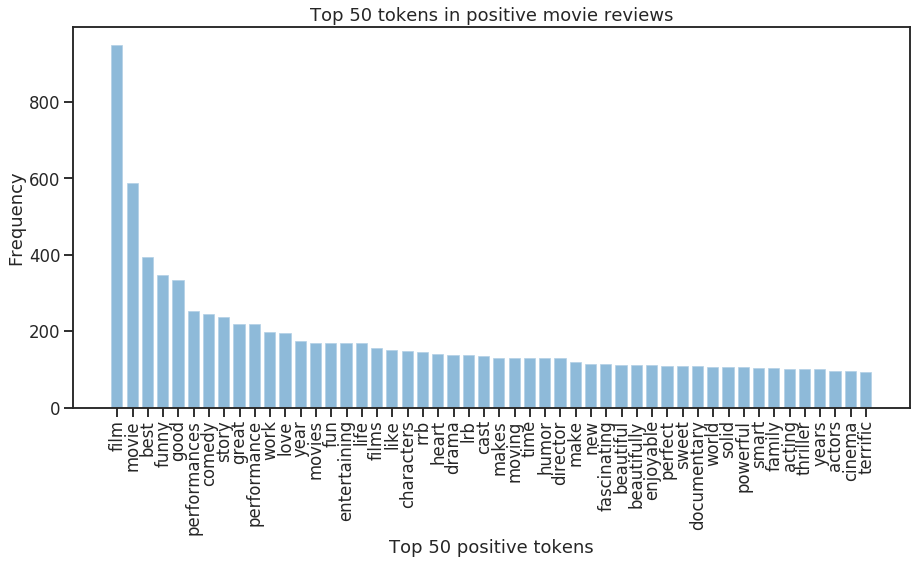

In [37]:
y_pos = np.arange(50)
plt.figure(figsize=(15,7))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive movie reviews')

Plot of top frequently used 50 phrases in negative movie reviews

Text(0.5, 1.0, 'Top 50 tokens in negative movie reviews')

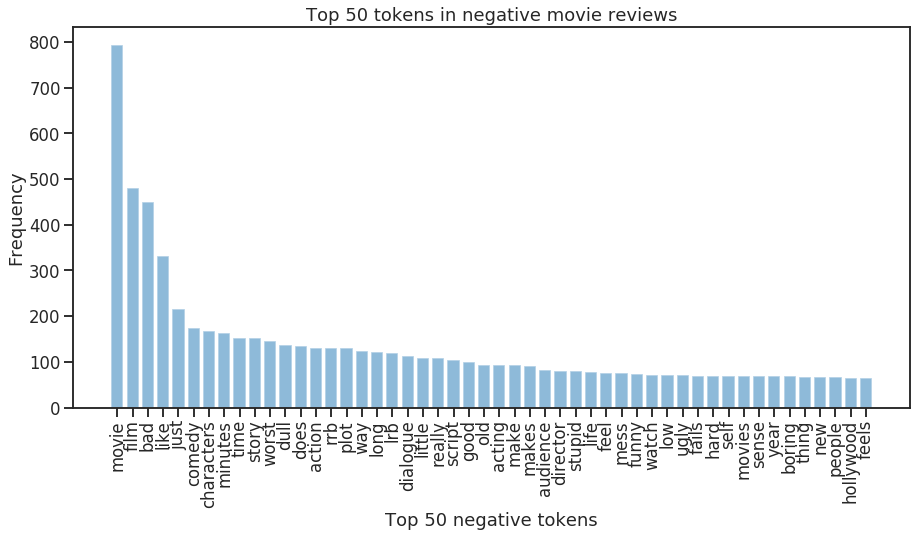

In [38]:
y_neg = np.arange(50)
plt.figure(figsize=(15,7))
plt.bar(y_neg, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_neg, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative movie reviews')

Traditional Supervised Machine Learning Models

Feature Engineering

In [0]:
phrase = np.array(df_train['Phrase'])
sentiments = np.array(df_train['Sentiment'])
# build train and test datasets

from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

Count Vectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build Bag-Of-Words on train phrases
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(phrase_train)

In [0]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(phrase_train)

In [0]:
# transform test reviews into features
cv_test_features = cv.transform(phrase_test)
tv_test_features = tv.transform(phrase_test)

In [43]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (124848, 10000)  Test features shape: (31212, 10000)
TFIDF model:> Train features shape: (124848, 93697)  Test features shape: (31212, 93697)


Logistic Regression model on Count Vectorizer

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [0]:

####Evaluation metrics


from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [46]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_bow_predictions,
                                      classes=[0,1,2,3,4])
                                    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.6275
Precision: 0.6082
Recall: 0.6275
F1 Score: 0.5965

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.55      0.25      0.35      1426
           1       0.54      0.32      0.40      5428
           2       0.66      0.89      0.76     15995
           3       0.57      0.40      0.47      6603
           4       0.57      0.32      0.41      1760

    accuracy                           0.63     31212
   macro avg       0.58      0.44      0.48     31212
weighted avg       0.61      0.63      0.60     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        360   574    442    48    2
        1        228  1739   3210   236   15
        2         49   727  14290   877   52
        3         15   184   3410  2636

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


Logistic Regression on TF-IDF features

In [47]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=sentiments_train,
                                               test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_tfidf_predictions,
                                      classes=[0,1,2,3,4])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.6335
Precision: 0.6216
Recall: 0.6335
F1 Score: 0.5985

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.65      0.18      0.28      1426
           1       0.55      0.33      0.42      5428
           2       0.65      0.90      0.76     15995
           3       0.60      0.43      0.50      6603
           4       0.61      0.23      0.33      1760

    accuracy                           0.63     31212
   macro avg       0.61      0.41      0.46     31212
weighted avg       0.62      0.63      0.60     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        258   665    482    20    1
        1        123  1810   3377   109    9
        2         18   682  14468   797   30
        3          0   101   3449  2840

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


Random Forest model on TF-IDF

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

In [49]:
# RandomForest model on TF-IDF
rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc_tfidf_predictions,
                                      classes=[0,1,2,3,4])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.6306
Precision: 0.6144
Recall: 0.6306
F1 Score: 0.6155

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.46      0.37      0.41      1426
           1       0.53      0.42      0.47      5428
           2       0.69      0.83      0.75     15995
           3       0.57      0.44      0.49      6603
           4       0.50      0.37      0.43      1760

    accuracy                           0.63     31212
   macro avg       0.55      0.49      0.51     31212
weighted avg       0.61      0.63      0.62     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        524   580    300    21    1
        1        476  2295   2503   144   10
        2        119  1264  13311  1236   65
        3         16   155   2946  2895

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [50]:
# Random Forest model on BOW features
rfc_bow_predictions = train_predict_model(classifier=rfc, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc_bow_predictions,
                                      classes=[0,1,2,3,4])
                                    

Model Performance metrics:
------------------------------
Accuracy: 0.63
Precision: 0.6195
Recall: 0.63
F1 Score: 0.623

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.47      0.39      0.43      1426
           1       0.52      0.46      0.49      5428
           2       0.71      0.79      0.75     15995
           3       0.54      0.50      0.52      6603
           4       0.49      0.43      0.46      1760

    accuracy                           0.63     31212
   macro avg       0.55      0.51      0.53     31212
weighted avg       0.62      0.63      0.62     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        563   599    240    22    2
        1        477  2487   2231   217   16
        2        127  1482  12589  1716   81
        3         17   200   2424  3271  691

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [0]:
from sklearn.svm import SVC
svc = SVC()

In [52]:
# Support Vector Machine model on TF-IDF
svc_tfidf_predictions = train_predict_model(classifier=svc, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc_tfidf_predictions,
                                      classes=[0,1,2,3,4])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.6306
Precision: 0.6144
Recall: 0.6306
F1 Score: 0.6155

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.46      0.37      0.41      1426
           1       0.53      0.42      0.47      5428
           2       0.69      0.83      0.75     15995
           3       0.57      0.44      0.49      6603
           4       0.50      0.37      0.43      1760

    accuracy                           0.63     31212
   macro avg       0.55      0.49      0.51     31212
weighted avg       0.61      0.63      0.62     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        524   580    300    21    1
        1        476  2295   2503   144   10
        2        119  1264  13311  1236   65
        3         16   155   2946  2895

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [53]:
# Support Vector Machine model on BOW features
svc_bow_predictions = train_predict_model(classifier=svc, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc_bow_predictions,
                                      classes=[0,1,2,3,4])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.63
Precision: 0.6195
Recall: 0.63
F1 Score: 0.623

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.47      0.39      0.43      1426
           1       0.52      0.46      0.49      5428
           2       0.71      0.79      0.75     15995
           3       0.54      0.50      0.52      6603
           4       0.49      0.43      0.46      1760

    accuracy                           0.63     31212
   macro avg       0.55      0.51      0.53     31212
weighted avg       0.62      0.63      0.62     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        563   599    240    22    2
        1        477  2487   2231   217   16
        2        127  1482  12589  1716   81
        3         17   200   2424  3271  691

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


**Logistic Regression on TF-IDF is outperforming other machine learning algorithms**. 



Creating a RNN - LSTM model

In [0]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re
def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        #review=[stemmer.stem(w) for w in word_tokenize(str(review).lower())]
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [57]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
df_train['clean_review'] = clean_review(df_train['Phrase'])
df_test['clean_review'] = clean_review(df_test['Phrase'])

In [59]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [60]:
train_text = df_train['clean_review'].values
test_text = df_test['clean_review'].values
y = to_categorical(df_train['Sentiment'].values)
print(train_text.shape,test_text.shape,y.shape)

(156060,) (66292,) (156060, 5)


In [61]:
X_train_text,X_val_text,y_train,y_val=train_test_split(train_text,y,test_size=0.2,stratify=y,random_state=123)
print(X_train_text.shape,y_train.shape)
print(X_val_text.shape,y_val.shape)

(124848,) (124848, 5)
(31212,) (31212, 5)


In [62]:
all_words=' '.join(X_train_text)
all_words=word_tokenize(all_words)
dist=FreqDist(all_words)
num_unique_word=len(dist)
num_unique_word

13732

In [0]:
len_x_train = []
for text in X_train_text:
    words = word_tokenize(text)
    len_x_train.append(len(words))
MAX_REVIEW_LEN=np.max(len_x_train)

In [64]:
#max features to be considered while tokening the training data
max_features = num_unique_word
#max length of each review
max_words = MAX_REVIEW_LEN
#as we can't pass entire dataset into training once we divide each epoches into no of iterations so the size of data in each iteratios is called batch size
batch_size = 128
#word embedding vecotr lenght for each word in high dimensional space
embedding_vecor_length = 250
#number of time entire data passed forward and backward through entire network 
epochs = 15
#no of classes in the output layer
num_classes=y.shape[1]
num_classes

5

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train_text))

X_train = tokenizer.texts_to_sequences(X_train_text)
X_val = tokenizer.texts_to_sequences(X_val_text)
X_test = tokenizer.texts_to_sequences(test_text)


In [66]:
#we will make each review to same length as max_review length so that every review as of same length, for less length padd with zeros
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_val.shape,X_test.shape,y.shape)

(124848, 48) (31212, 48) (66292, 48) (156060, 5)


In [67]:
#instantiate keras model with sequential constructor
model=Sequential()
#embedding layer is used to represent words in the meaningful vectors in a dimensional space, so it takes total number words,size of vector,
model.add(Embedding(max_features,250,mask_zero=True))
#LSTM layer with 128 neurons, dropout for configuring the input dropout and recurrent_dropout for configuring the recurrent dropout
model.add(LSTM(128,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
#return_sequences=True argument,
#What this does is ensure that the LSTM cell returns all of the outputs from the unrolled LSTM cell through time. If this argument is left out, the LSTM cell will simply provide the output of the LSTM cell from the last time step
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
#since it's classification problem we use dense layer with no of classes.
model.add(Dense(num_classes,activation='softmax'))
#finally compiling model, loss = 'categorical_crossentropy' because of many classes, adam optimizer because its effective “all round” with adaptive stepping, metrics is ‘categorical_accuracy’ --  which can let us see how the accuracy is improving during training
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
#summary of model
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 250)         3433000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         194048    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 3,676,781
Trainable params: 3,676,781
Non-trainable params: 0
_________________________________________________________________


In [68]:
%%time

history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=10, batch_size=batch_size, verbose=1)




Train on 124848 samples, validate on 31212 samples
Epoch 1/10





124848/124848 [==============================] - 240s 2ms/step - loss: 1.0149 - acc: 0.5963 - val_loss: 0.8496 - val_acc: 0.6514
Epoch 2/10
124848/124848 [==============================] - 232s 2ms/step - loss: 0.8047 - acc: 0.6680 - val_loss: 0.8210 - val_acc: 0.6646
Epoch 3/10
124848/124848 [==============================] - 234s 2ms/step - loss: 0.7414 - acc: 0.6921 - val_loss: 0.8068 - val_acc: 0.6697
Epoch 4/10
124848/124848 [==============================] - 234s 2ms/step - loss: 0.6948 - acc: 0.7100 - val_loss: 0.8227 - val_acc: 0.6653
Epoch 5/10
124848/124848 [==============================] - 229s 2ms/step - loss: 0.6571 - acc: 0.7243 - val_loss: 0.8211 - val_acc: 0.6722
Epoch 6/10
124848/124848 [==============================] - 228s 2ms/step - loss: 0.6254 - acc: 0.7352 - val_loss: 0.8433 - val_acc: 0.6696
Epoch 7/10
124848/124848 [==============================] - 226s 2ms/step - loss: 0.5988 - acc: 0.744

Topic modelling

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Lets take the reviews.text column from the data
text = df_train[["Phrase"]]
print(text['Phrase'][0])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .


In [0]:
# Step 1 : Convert every thing into lower case

text['Clean_text'] = text['Phrase'].str.lower().str.replace('[^a-z ]', '')
print(text['Clean_text'][0])

a series of escapades demonstrating the adage that what is good for the goose is also good for the gander  some of which occasionally amuses but none of which amounts to much of a story 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# Step 2: Remove stop words

stop = set(stopwords.words('english'))

def sw(text):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)

text['Split_words'] = text['Clean_text'].apply(sw)

print(text['Split_words'][0])

series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
text.head()

,Phrase,Clean_text,Split_words
0,A series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goos...
1,A series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goose
2,A series,a series,series
3,A,a,
4,series,series,series


In [0]:
# Create a DTM with Tfidf vectorizer

vect = TfidfVectorizer()

DTM = vect.fit_transform(text['Split_words'])

DTM

<156060x16063 sparse matrix of type '<class 'numpy.float64'>'
	with 607602 stored elements in Compressed Sparse Row format>

In [0]:
# Model 

lda = LatentDirichletAllocation(n_components=5 , max_iter= 10)

lda_output = lda.fit_transform(DTM)

print(lda_output)

[[0.13930915 0.32856859 0.04515009 0.44370668 0.04326549]
 [0.21607023 0.60629657 0.05932111 0.05918721 0.05912489]
 [0.10070605 0.59581781 0.10098045 0.10114877 0.10134692]
 ...
 [0.08284491 0.08284485 0.0828449  0.66862031 0.08284504]
 [0.10000288 0.10000279 0.10000286 0.59998843 0.10000305]
 [0.10000288 0.10000279 0.10000286 0.59998843 0.10000305]]


In [0]:
lda_output.shape

(156060, 5)

In [0]:
# Document Topic Matrix
topicname = ['Topic' + str(i) for i in range(lda.n_components)]

docname = ['Doc' + str(i) for i in range(DTM.shape[0])] 

In [0]:
df_documemt_topic = pd.DataFrame(np.round(lda_output,2) , columns=topicname, index = docname)

df_documemt_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4
Doc0,0.14,0.33,0.05,0.44,0.04
Doc1,0.22,0.61,0.06,0.06,0.06
Doc2,0.10,0.60,0.10,0.10,0.10
Doc3,0.20,0.20,0.20,0.20,0.20
Doc4,0.10,0.60,0.10,0.10,0.10


In [0]:
dominating_topic = np.argmax(df_documemt_topic.values, axis = 1)
dominating_topic

array([3, 1, 1, ..., 3, 3, 3])

In [0]:
df_documemt_topic['Dom_topic'] = dominating_topic
df_documemt_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Dom_topic
Doc0,0.14,0.33,0.05,0.44,0.04,3
Doc1,0.22,0.61,0.06,0.06,0.06,1
Doc2,0.10,0.60,0.10,0.10,0.10,1
Doc3,0.20,0.20,0.20,0.20,0.20,0
Doc4,0.10,0.60,0.10,0.10,0.10,1


In [0]:
df_documemt_topic['Dom_topic'].value_counts()

0    32783
1    32373
2    31828
4    29878
3    29198
Name: Dom_topic, dtype: int64

In [0]:
lda.components_

array([[0.20004412, 0.20030705, 0.20002926, ..., 6.68639343, 0.2000226 ,
        0.20158015],
       [0.2007736 , 0.20101799, 0.20002916, ..., 0.20001781, 0.20008417,
        0.20003655],
       [3.49158088, 9.06290757, 2.71300116, ..., 0.20002874, 5.86386712,
        0.20067499],
       [0.20362157, 0.20082249, 0.20003202, ..., 0.20016429, 0.20002317,
        4.37935351],
       [0.20004348, 0.20105016, 0.20003118, ..., 0.20001726, 0.2002816 ,
        0.200038  ]])

In [0]:
# Creating the dataframe between topic and terms

df_topic_keywords = pd.DataFrame(lda.components_)

df_topic_keywords

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16023,16024,16025,16026,16027,16028,16029,16030,16031,16032,16033,16034,16035,16036,16037,16038,16039,16040,16041,16042,16043,16044,16045,16046,16047,16048,16049,16050,16051,16052,16053,16054,16055,16056,16057,16058,16059,16060,16061,16062
0,0.200044,0.200307,0.200029,0.200021,0.200575,0.200021,0.200027,2.643932,0.217608,15.079192,3.249578,2.714804,2.778922,2.779812,6.313785,0.200445,0.200033,0.201910,0.200020,36.619772,10.546611,0.200016,0.202683,0.200019,2.747430,0.201316,3.095546,0.201126,0.200023,0.200016,7.188759,0.200520,0.200022,14.246281,2.007925,0.200043,0.200024,0.202153,0.200019,18.288540,...,0.200057,4.836971,5.579869,2.102905,0.200069,0.200046,0.200036,0.200024,0.200020,0.200144,7.091070,4.766127,13.342239,0.200090,0.202734,0.200028,0.200037,0.200036,0.200026,4.459225,0.200055,0.200022,0.200037,8.793720,0.200033,0.200022,0.200353,0.203268,0.200024,0.200077,0.200022,0.200021,0.200698,28.683346,0.200022,0.200019,0.200037,6.686393,0.200023,0.201580
1,0.200774,0.201018,0.200029,0.200020,30.827071,0.200044,4.125078,0.200033,0.200057,0.201225,0.200024,0.200033,0.200655,7.183205,0.200018,4.172851,0.200033,5.336312,6.897685,0.200985,0.203605,0.200017,1.508879,0.200019,4.118707,0.200030,5.713777,4.958290,0.200197,0.200016,0.200112,0.200023,0.200021,0.200084,9.367491,0.202034,0.200023,3.222814,0.200201,0.201615,...,0.200691,0.200024,0.203681,0.201849,0.200026,3.645805,0.200036,0.200025,0.200019,2.199942,0.200020,0.200156,0.200996,0.200062,0.200028,0.200027,0.200034,0.201055,0.200029,0.200020,1.685604,0.200021,8.675780,0.200020,0.200032,5.721533,0.200239,3.713029,0.200032,0.200024,4.123430,0.200048,0.205373,0.200953,3.941944,0.200019,0.200036,0.200018,0.200084,0.200037
2,3.491581,9.062908,2.713001,0.200071,0.200769,0.200021,0.200027,0.200076,0.200288,0.200811,0.200025,0.200081,0.200309,1.088736,0.200018,0.200113,0.200032,34.495035,0.200020,14.629325,0.203777,7.107240,0.200058,0.200019,0.201421,0.201676,0.200048,0.200022,5.629853,0.200320,0.200095,5.931430,0.200021,0.200032,26.261344,2.851697,0.200683,29.917282,0.200311,0.200639,...,2.195099,0.200360,0.200036,8.737116,8.818138,0.200051,0.200281,0.200338,7.850148,0.200056,0.200106,0.200024,0.200233,4.775915,0.200030,5.823176,3.771927,0.200201,5.793109,0.200257,0.206572,0.200022,0.200037,0.200022,0.200034,0.200022,0.200152,0.202926,7.983368,0.200024,0.200021,11.949805,5.275386,6.569151,0.200101,0.200269,0.200036,0.200029,5.863867,0.200675
3,0.203622,0.200822,0.200032,0.200022,0.200378,0.200071,0.200935,0.200036,3.815826,0.200033,0.200027,0.200036,4.219053,0.200084,0.200177,0.200026,0.202320,5.625001,0.200022,11.338753,0.200721,0.200018,2.736847,9.140653,0.200684,0.200035,0.200591,0.200025,0.200025,4.752698,3.216877,0.200026,0.200162,4.325109,0.203176,5.815226,0.200725,9.377107,5.649841,15.189773,...,1.562869,0.200026,0.200039,0.202213,0.200037,0.200381,3.502053,6.234555,0.200021,1.052387,0.200020,0.200057,0.200031,0.200027,0.200032,0.200031,0.200037,19.463784,0.200061,0.200211,0.200061,0.200024,0.381030,0.200023,4.266439,0.200025,2.588500,0.209934,0.200023,5.175481,0.200023,0.200023,0.200056,0.202039,0.200024,4.834243,2.199853,0.200164,0.200023,4.379354
4,0.200043,0.201050,0.200031,7.674780,0.202452,7.401445,0.200753,3.894955,0.200056,0.200297,0.200115,3.148800,0.200043,0.210193,0.200020,0.200112,3.962987,8.013007,0.200021,0.201871,0.200045,0.200020,0.200068,0.200020,0.200048,5.739835,0.200199,0.200023,0.200025,0.200388,0.200033,0.200025,6.534654,0.200032,1.158749,0.200046,7.978325,0.201867,0.200969,0.200798,...,0.200580,0.200895,0.200038,4.156337,0.203455,1.775087,1.554613,0.200500,0.200022,0.200061,0.200020,0.200026,0.201879,0.200023,4.686369,0.200898,0.205678,0.200872,0.203179,0.200023,0.201728,4.056077,0.201983,0.200507,0.201956,0.200089,8.120292,0.200064,0.200021,0.200980,0.200022,0.200426,0.202825,13.371795,0.200065,0.200021,0.200039,0.200017,0.200282,0.20003

In [0]:
# Naming the Columns and Rows

df_topic_keywords.columns = vect.get_feature_names()

df_topic_keywords.index = topicname

df_topic_keywords

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,abderrahmane,abdul,abel,abhorrent,abhors,abiding,abilities,ability,abject,able,ably,abomination,aboriginal,abornin,aborted,abound,aboveaverage,abrasive,abridged,abroad,abrupt,absence,absent,absolute,absolutely,absorb,absorbed,absorbing,absorbs,abstract,...,zaza,zboys,ze,zeal,zealand,zealanders,zealously,zeitgeist,zelda,zellweger,zemeckis,zen,zero,zerodimensional,zeroes,zest,zeus,zhang,zhao,zhuangzhuang,zigzag,zingerfilled,zingers,zings,zip,zipper,zippy,zips,zishe,ziyi,zoe,zombie,zombieland,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
Topic0,0.200044,0.200307,0.200029,0.200021,0.200575,0.200021,0.200027,2.643932,0.217608,15.079192,3.249578,2.714804,2.778922,2.779812,6.313785,0.200445,0.200033,0.201910,0.200020,36.619772,10.546611,0.200016,0.202683,0.200019,2.747430,0.201316,3.095546,0.201126,0.200023,0.200016,7.188759,0.200520,0.200022,14.246281,2.007925,0.200043,0.200024,0.202153,0.200019,18.288540,...,0.200057,4.836971,5.579869,2.102905,0.200069,0.200046,0.200036,0.200024,0.200020,0.200144,7.091070,4.766127,13.342239,0.200090,0.202734,0.200028,0.200037,0.200036,0.200026,4.459225,0.200055,0.200022,0.200037,8.793720,0.200033,0.200022,0.200353,0.203268,0.200024,0.200077,0.200022,0.200021,0.200698,28.683346,0.200022,0.200019,0.200037,6.686393,0.200023,0.201580
Topic1,0.200774,0.201018,0.200029,0.200020,30.827071,0.200044,4.125078,0.200033,0.200057,0.201225,0.200024,0.200033,0.200655,7.183205,0.200018,4.172851,0.200033,5.336312,6.897685,0.200985,0.203605,0.200017,1.508879,0.200019,4.118707,0.200030,5.713777,4.958290,0.200197,0.200016,0.200112,0.200023,0.200021,0.200084,9.367491,0.202034,0.200023,3.222814,0.200201,0.201615,...,0.200691,0.200024,0.203681,0.201849,0.200026,3.645805,0.200036,0.200025,0.200019,2.199942,0.200020,0.200156,0.200996,0.200062,0.200028,0.200027,0.200034,0.201055,0.200029,0.200020,1.685604,0.200021,8.675780,0.200020,0.200032,5.721533,0.200239,3.713029,0.200032,0.200024,4.123430,0.200048,0.205373,0.200953,3.941944,0.200019,0.200036,0.200018,0.200084,0.200037
Topic2,3.491581,9.062908,2.713001,0.200071,0.200769,0.200021,0.200027,0.200076,0.200288,0.200811,0.200025,0.200081,0.200309,1.088736,0.200018,0.200113,0.200032,34.495035,0.200020,14.629325,0.203777,7.107240,0.200058,0.200019,0.201421,0.201676,0.200048,0.200022,5.629853,0.200320,0.200095,5.931430,0.200021,0.200032,26.261344,2.851697,0.200683,29.917282,0.200311,0.200639,...,2.195099,0.200360,0.200036,8.737116,8.818138,0.200051,0.200281,0.200338,7.850148,0.200056,0.200106,0.200024,0.200233,4.775915,0.200030,5.823176,3.771927,0.200201,5.793109,0.200257,0.206572,0.200022,0.200037,0.200022,0.200034,0.200022,0.200152,0.202926,7.983368,0.200024,0.200021,11.949805,5.275386,6.569151,0.200101,0.200269,0.200036,0.200029,5.863867,0.200675
Topic3,0.203622,0.200822,0.200032,0.200022,0.200378,0.200071,0.200935,0.200036,3.815826,0.200033,0.200027,0.200036,4.219053,0.200084,0.200177,0.200026,0.202320,5.625001,0.200022,11.338753,0.200721,0.200018,2.736847,9.140653,0.200684,0.200035,0.200591,0.200025,0.200025,4.752698,3.216877,0.200026,0.200162,4.325109,0.203176,5.815226,0.200725,9.377107,5.649841,15.189773,...,1.562869,0.200026,0.200039,0.202213,0.200037,0.200381,3.502053,6.234555,0.200021,1.052387,0.200020,0.200057,0.200031,0.200027,0.200032,0.200031,0.200037,19.463784,0.200061,0.200211,0.200061,0.200024,0.381030,0.200023,4.266439,0.200025,2.588500,0.209934,0.200023,5.175481,0.200023,0.200023,0.200056,0.202039,0.200024,4.834243,2.199853,0.200164,0.200023,4.379354
Topic4,0.200043,0.201050,0.200031,7.674780,0.202452,7.401445,0.200753,3.894955,0.200056,0.200297,0.200115,3.148800,0.200043,0.210193,0.200020,0.200112,3.962987,8.013007,0.200021,0.201871,0.200045,0.200020,0.200068,0.200020,0.200048,5.739835,0.200199,0.200023,0.200025,0.200388,0.200033,0.200025,6.534654,0.200032,1.158749,0.200046,7.978325,0.201867,0.200969,0.200798,...,0.200580,0.200895,0.200038,4.156337,0.203455,1.775087,1.554613,0.20050

In [0]:
#  Finding The top 20 words for each topic

def show_topic(vect , lda , n_words):
    keywords = np.array(vect.get_feature_names())
    topic_keywords = []
    for topic_weights in lda.components_:
        topic_keywords_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(topic_keywords_locs))
    return topic_keywords

topic_keywords = show_topic(vect = vect , lda=lda , n_words=20)
topic_keywords

[array(['time', 'good', 'movie', 'way', 'film', 'rrb', 'best', 'see',
        'one', 'nt', 'us', 'really', 'lrb', 'actors', 'years', 'get',
        'interesting', 'hard', 'thing', 'much'], dtype='<U23'),
 array(['movie', 'film', 'bad', 'funny', 'one', 'performances', 'movies',
        'great', 'seen', 'year', 'little', 'screen', 'point', 'comedy',
        'sweet', 'fun', 'works', 'well', 'nt', 'thriller'], dtype='<U23'),
 array(['film', 'nt', 'much', 'movie', 'one', 'enough', 'characters',
        'character', 'better', 'like', 'plot', 'many', 'people', 'even',
        'work', 'worth', 'films', 'story', 'new', 'interest'], dtype='<U23'),
 array(['story', 'film', 'love', 'nt', 'human', 'movie', 'one', 'women',
        'compelling', 'made', 'performance', 'like', 'strong', 'full',
        'heart', 'feel', 'direction', 'star', 'script', 'world'],
       dtype='<U23'),
 array(['minutes', 'comedy', 'movie', 'like', 'life', 'film', 'subject',
        'long', 'moments', 'romantic', 'times', '

In [0]:
# Creating a DataFrame

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,time,good,movie,way,film,rrb,best,see,one,nt,us,really,lrb,actors,years,get,interesting,hard,thing,much
1,movie,film,bad,funny,one,performances,movies,great,seen,year,little,screen,point,comedy,sweet,fun,works,well,nt,thriller
2,film,nt,much,movie,one,enough,characters,character,better,like,plot,many,people,even,work,worth,films,story,new,interest
3,story,film,love,nt,human,movie,one,women,compelling,made,performance,like,strong,full,heart,feel,direction,star,script,world
4,minutes,comedy,movie,like,life,film,subject,long,moments,romantic,times,make,documentary,story,something,sense,cast,two,dark,right
